# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame - merge
combined_metadata = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how="left")
# Display the data table for preview
combined_metadata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
count_mice= combined_metadata['Mouse ID'].value_counts()
#print(count_mice)
total_mice = len(count_mice)
print(f"The total number of mice is {total_mice}.")

The total number of mice is 249.


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#print(combined_metadata[['Mouse ID', 'Timepoint']])
unique_mousetime = combined_metadata[['Mouse ID', 'Timepoint']]
unique_mousetime.head()
duplicate_mouse_count = unique_mousetime.value_counts()
duplicate_mouse_count.head()
duplicate_mouse_count = duplicate_mouse_count[duplicate_mouse_count > 1]
if not duplicate_mouse_count.empty:
    print("Mouse IDs with duplicate time points:")
    print(duplicate_mouse_count)
duplicate_mouse_count.shape


Mouse IDs with duplicate time points:
Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
Name: count, dtype: int64


(5,)

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
combined_metadata.query("`Mouse ID` == 'g989'")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered_df = combined_metadata.query("`Mouse ID` != 'g989'")
#filtered_df = combined_metadata[(combined_metadata['Mouse ID']) != 'g989']
filtered_df.head()

#checking for the filtered value to make sure it worked
# try:
#     filtered_df.query("`Mouse ID` == 'g989'")
#     print("found")
#     print(filtered_df.query("`Mouse ID` == 'g989'"))
# except Error:
#     print("not found!")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
# the length
count_mice2= filtered_df['Mouse ID'].value_counts()
total_mice2 = len(count_mice2)
print(f"The total number of mice is {total_mice2}.")


The total number of mice is 248.


## Summary Statistics

In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_grouped = filtered_df.groupby(by='Drug Regimen')
#drug_grouped = filtered_df.groupby(["Drug Regimen", "Tumor Volume (mm3)"])
#drug_grouped['Tumor Volume (mm3)'].describe()

# mean, median, variance, standard deviation, and SEM of the tumor volume.
#my plan: calc each as series, create df using dictionaries with keys as name of columns and tokens as series values
drug_tumor_mean = drug_grouped['Tumor Volume (mm3)'].mean()
#print(drug_tumor_mean)
#print(type(drug_tumor_mean))
drug_tumor_median = drug_grouped['Tumor Volume (mm3)'].median()
#print(drug_tumor_median)
drug_tumor_variance = drug_grouped['Tumor Volume (mm3)'].var()
#print(drug_tumor_variance)
drug_tumor_std = drug_grouped['Tumor Volume (mm3)'].std()
#print(drug_tumor_std)
drug_tumor_sem = drug_grouped['Tumor Volume (mm3)'].sem()
#print(drug_tumor_sem)

# Assemble the resulting series into a single summary DataFrame.
drug_tumor_dict = {'Mean Tumor Volume': drug_tumor_mean,
                  'Median Tumor Volume': drug_tumor_median,
                  'Tumor Volume Variance': drug_tumor_variance,
                  'Tumor Volume Std. Dev.': drug_tumor_std,
                  'Tumor Volume Std. Err.': drug_tumor_sem}
#print(drug_tumor_dict)
drug_tumor_df = pd.DataFrame(drug_tumor_dict)
drug_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [95]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
filtered_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# Observed Mouse Timepoints'>

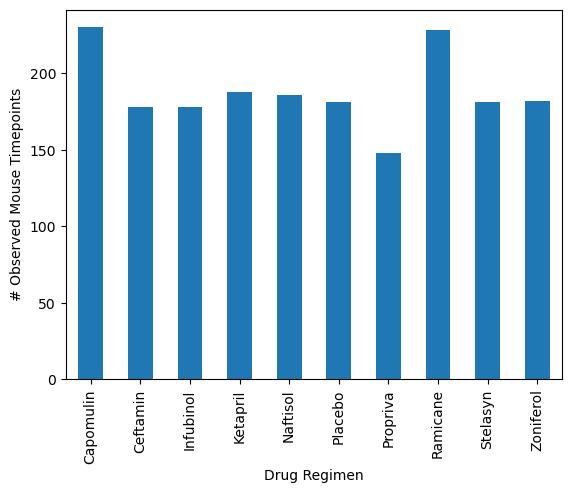

In [183]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_each_drug = drug_grouped["Drug Regimen"].value_counts()
#print(total_each_drug)
total_each_drug.plot(kind='bar',  xlabel = 'Drug Regimen', ylabel = '# Observed Mouse Timepoints')

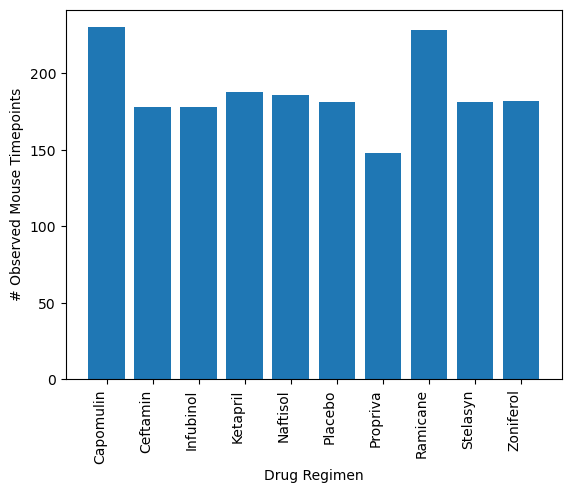

In [185]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_each_drug_df = pd.DataFrame(total_each_drug)
total_each_drug_df.head()
plt.bar(total_each_drug_df.index, total_each_drug_df['count'])
plt.xlabel('Drug Regimen')
plt.ylabel('# Observed Mouse Timepoints')
plt.xticks(rotation=90, ha="right")
plt.show()

Sex
Male      958
Female    922
Name: count, dtype: int64


<Axes: ylabel='count'>

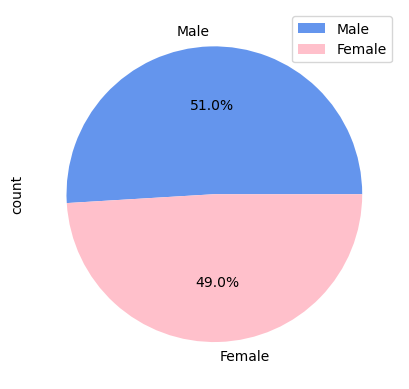

In [209]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
labels = ['Male','Female']
colors = ['cornflowerblue','pink']
#genders_grouped=filtered_df.groupby(by='Sex')
genders_count = filtered_df["Sex"].value_counts()
print(genders_count)
genders_count.plot(kind='pie', labels=labels, colors =colors, legend = True, autopct='%1.1f%%')

# Get the unique mice with their gender
# Make the pie chart

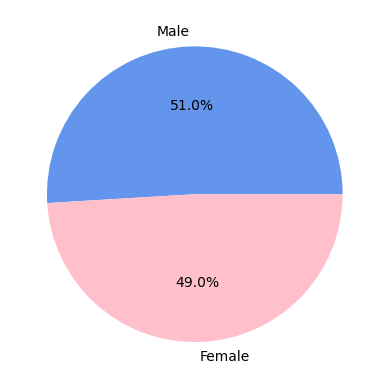

In [211]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
genders_df = pd.DataFrame(genders_count)
genders_df.head()
plt.pie(x=genders_df['count'],labels=labels,colors=colors,autopct='%1.1f%%')
plt.show()
# Get the unique mice with their gender
# Make the pie chart

## Quartiles, Outliers and Boxplots

In [233]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse - CONTINUE FROM HERE
#maybe better for finding max timepoint for each mouse
ID_group = filtered_df.groupby(by='Mouse ID')
timepoint = ID_group[['Timepoint','Drug Regimen']].value_counts()
#start max_timepoint calc

#alt for get info on mouse, timepoint, drug
print(timepoint)
drug_time_count = drug_grouped[['Timepoint', 'Mouse ID']].value_counts()
print(drug_time_count)

#do above then turn this grouped into own data frame
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Mouse ID  Timepoint  Drug Regimen
a203      0          Infubinol       1
          5          Infubinol       1
          10         Infubinol       1
          15         Infubinol       1
          20         Infubinol       1
                                    ..
z969      25         Naftisol        1
          30         Naftisol        1
          35         Naftisol        1
          40         Naftisol        1
          45         Naftisol        1
Name: count, Length: 1880, dtype: int64
Drug Regimen  Timepoint  Mouse ID
Capomulin     0          b128        1
                         b742        1
                         f966        1
                         g288        1
                         g316        1
                                    ..
Zoniferol     45         p136        1
                         q511        1
                         q633        1
                         s337        1
                         w575        1
Name: count, Length: 1880, dtype: 

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


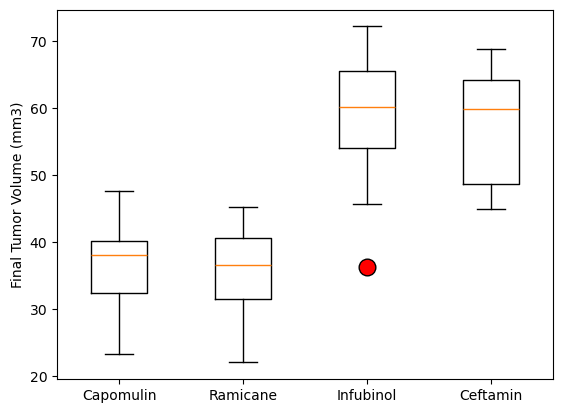

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

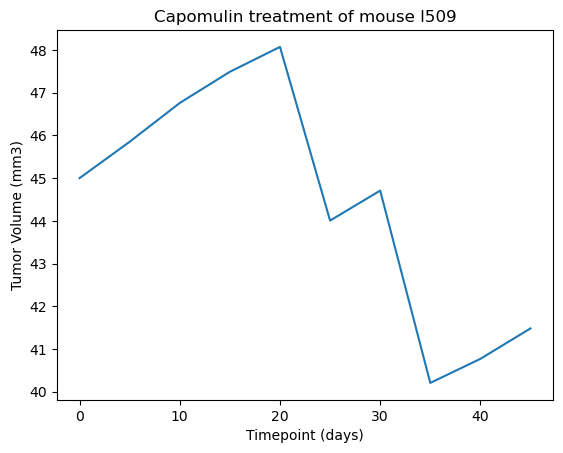

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


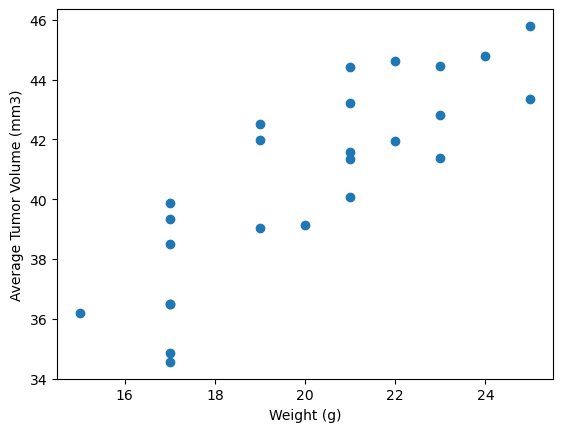

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


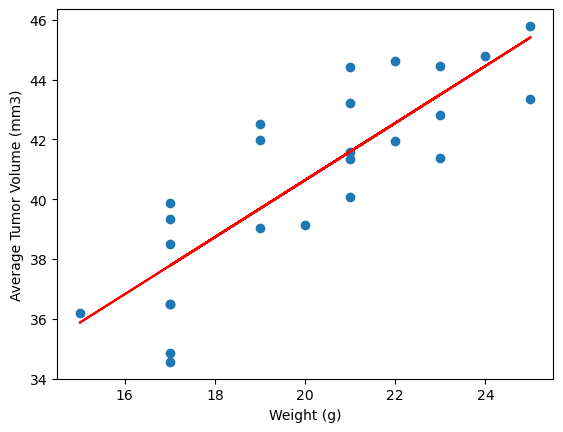

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
